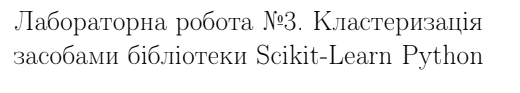
Варіант 14
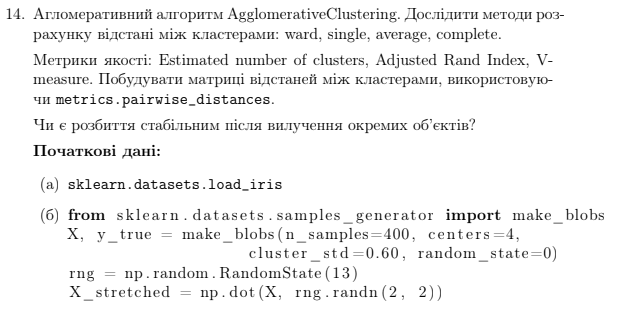

Agglomerative Hierarchical Clustering є найбільш поширеним типом ієрархічної кластеризації використовуваної для групування об'єктів в кластери на основі їх подібності. Алгоритм починається з обробки кожного об’єкта як однотонного кластера. Далі, пари кластерів послідовно об’єднуються, поки всі кластери не будуть об’єднані в один великий кластер, що містить усі об’єкти. Результатом є представлення об’єктів на основі дерева, яке називається дендрограмою. 
Агломеративна кластеризація працює «знизу вгору». Тобто кожен об’єкт спочатку розглядається як одноелементний кластер (лист). На кожному кроці алгоритму два найбільш схожі кластери об’єднуються в новий більший кластер (вузли). Ця процедура повторюється, поки всі точки не стануть членами лише одного великого кластера (корінь).

In [4]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

Ініціалізуємо початкові дані:

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X_iris, y_iris = iris.data, iris.target
number_clusters_iris = len(iris['target_names'])

In [5]:
from sklearn.datasets import make_blobs
X, y_blobs = make_blobs(n_samples=400, centers=4, cluster_std=0.6, random_state=0)
rng = np.random.RandomState(13)
X_blobs = np.dot(X, rng.randn(2, 2))
number_clusters_blobs = len(np.unique(y_blobs))

### Представимо початкові дані графічно

##### Для iris:

In [4]:
import plotly_express as px

df = pd.DataFrame(iris['data'], columns = iris['feature_names'])    
 
px.scatter_3d(df, x="petal length (cm)", y="petal width (cm)", 
              z="sepal length (cm)", size="sepal width (cm)", opacity=1)

###### Для blobs:

In [6]:
X_blobs


array([[-4.66891442e-01,  3.11996928e+00],
       [ 1.80978596e+00, -8.94204621e-01],
       [ 1.92941725e+00, -7.99470347e-01],
       [-6.92773937e-01,  2.47910311e+00],
       [ 1.70024509e+00, -8.33930097e-01],
       [ 8.65821079e-01,  2.24293257e+00],
       [-1.62113079e+00,  2.05475839e+00],
       [-1.91501460e-01,  1.89281141e+00],
       [ 1.14078006e+00,  1.79370867e-02],
       [-1.31564551e+00,  1.90600934e+00],
       [ 3.28358319e-01,  2.81741299e+00],
       [-1.80300531e+00,  1.98354320e+00],
       [-1.81835442e+00,  3.31264240e+00],
       [ 1.55482667e+00, -2.69852540e-01],
       [ 4.32613829e-01,  7.38947723e-01],
       [-2.35054260e+00,  2.94509702e+00],
       [ 1.21708865e+00, -6.41425138e-01],
       [-1.17481010e+00,  1.40892676e+00],
       [-1.04070643e+00,  2.67670335e+00],
       [ 7.16757249e-01,  6.77035928e-01],
       [ 6.00684063e-01,  7.95350120e-01],
       [ 1.35766415e+00, -3.58617971e-01],
       [ 1.07434814e+00,  1.75757715e+00],
       [-9.

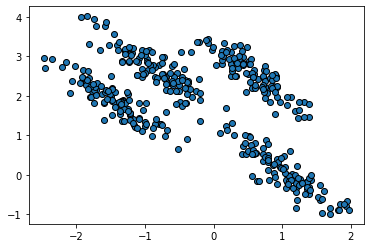

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X_blobs[:, 0], X_blobs[:, 1], edgecolor="k")
plt.show()

### Виконаємо кластеризацію даних

Порівняємо методи розрахунку відстані між кластерами:
- ward – мінімізує суму квадратів різниць між об'єктами у двох кластерах, що об'єднуються. Гарно працює з евклідовою метрикою.
- single – мінімізує відстані між найближчими точками (об'єктами) у двох кластерах
- average – мінімізує середню відстань між усіма точками (об’єктами) у двох кластерах
- complete – мінімізує максимальну відстань між точками (об'єктами) у двох кластерах

In [6]:
ward = AgglomerativeClustering(n_clusters=number_clusters_iris, linkage="ward").fit(X_iris)
single = AgglomerativeClustering(n_clusters=number_clusters_iris, linkage="single").fit(X_iris)
average = AgglomerativeClustering(n_clusters=number_clusters_iris, linkage="average").fit(X_iris)
complete = AgglomerativeClustering(n_clusters=number_clusters_iris, linkage="complete").fit(X_iris)

In [7]:
y_iris_ward= ward.labels_
y_iris_single = single.labels_
y_iris_average = average.labels_
y_iris_complete = complete.labels_

In [8]:
def visualization_iris(X, y_pred):
    features = ['sepal length', 'sepal width', 'petal length', 'petal width']
    df = pd.DataFrame(X, columns = features) 
    df["target"] = y_pred
    df['target_name'] = df['target'].replace([0,1,2], ['setosa', 'versicolor', 'virginica'])
    fig = px.scatter_3d(df, x="petal length", y="petal width", 
                        z="sepal length", size="sepal width", 
                        color='target_name', opacity=1)
    
    fig.show()

In [9]:
def plot_pairwise_distances(X, y, number_clusters):
    avg_dist = np.zeros((number_clusters, number_clusters))
    for i in range(number_clusters):
        for j in range(number_clusters):
            avg_dist[i, j] = metrics.pairwise_distances(X[y == i], 
                                                        X[y == j]).mean()
    avg_dist /= avg_dist.max()
    
    plt.figure(figsize=(5, 4.5))
    for i in range(number_clusters):
        for j in range(number_clusters):
            plt.text(i, j, '%5.3f' % avg_dist[i, j], 
                     verticalalignment='center', horizontalalignment='center')
        
    clusters = ['Cluster '+ str(i) for i in range(number_clusters)]
    plt.imshow(avg_dist, interpolation='nearest', cmap=plt.cm.gnuplot2, vmin=0)
    plt.xticks(range(number_clusters), clusters, rotation=45)
    plt.yticks(range(number_clusters), clusters)
    plt.colorbar()
    plt.tight_layout()
    plt.show()

Матриця pairwise_distance - матриця міжкластерних вiдстаней для вектору X, або між X та заданим Y.

Дослідимо метрики якості кластеризації:
- Estimated numbers of clusters.
- Adjusted Rand Index - oбчислює міру подібності між двома кластерами розглянувши всі пари зразків і підрахувавши пари, які є віднесені до тих самих або різних кластерів у передбачених і справжніх кластеризаціях. ARI використовується для вимірювання подібності точок даних, представлених у кластерах, тобто, наскільки схожі екземпляри, які присутні в кластері. Оцінка подібності від -1 до 1. Отже, цей показник має бути близьки до 1, коли кластеризації ідентичні та інакше, коли показник близький до 0 ми можемо припустити, що точки даних розподілені випадковим чином у кластерах.
- V-measure - середнє гармонічне homogeneity та completeness:
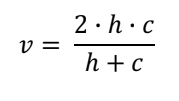
> - homogeneity : величина, рівна одиниці мінус
відношення ентропії класу за умови кластера до ентропії класу. Максимальна, якщо кластер складається лише з об'єктів одного класу;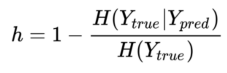
> - completeness : величина, рівна одиниці мінус
відношення ентропії кластера за умови класу до ентропії кластера. Максимальна, якщо всі об'єкти з класу належать лише до певного кластеру;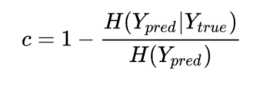

Обмежені оцінки : 0,0 — це дуже погано, наскільки це можливо, 1,0 — ідеальний результат. 

Кластеризація методом розрахунку відстанні "ward":

Estimated number of clusters:  3
Adjusted Rand Index:  0.7311985567707746
V-measure:  0.7700836616487869


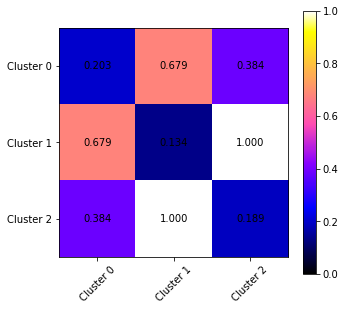

In [10]:
visualization_iris(X_iris, y_iris_ward)
print('Estimated number of clusters: ', len(set(y_iris_ward)))
print('Adjusted Rand Index: ',metrics.adjusted_rand_score(y_iris, y_iris_ward))
print('V-measure: ', metrics.v_measure_score(y_iris, y_iris_ward))
plot_pairwise_distances(X_iris, y_iris_ward, number_clusters_iris)

Кластеризація методом розрахунку відстанні "single":

Estimated number of clusters:  3
Adjusted Rand Index:  0.5637510205230709
V-measure:  0.7174643320814477


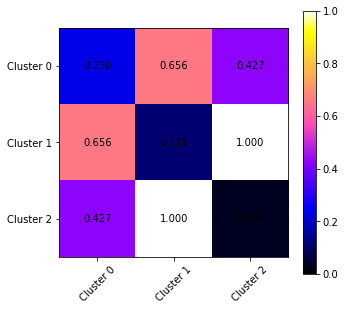

In [11]:
visualization_iris(X_iris, y_iris_single)
print('Estimated number of clusters: ', len(set(y_iris_single)))
print('Adjusted Rand Index: ', metrics.adjusted_rand_score(y_iris, y_iris_single))
print('V-measure: ', metrics.v_measure_score(y_iris, y_iris_single))
plot_pairwise_distances(X_iris, y_iris_single, number_clusters_iris)

Кластеризація методом розрахунку відстанні "average":

Estimated number of clusters:  3
Adjusted Rand Index:  0.7591987071071522
V-measure:  0.805693691215336


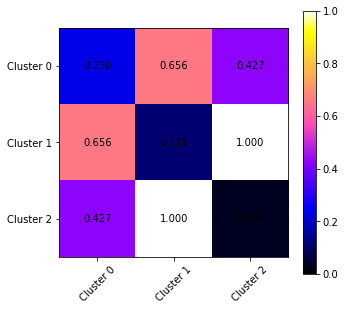

In [12]:
visualization_iris(X_iris, y_iris_average)
print('Estimated number of clusters: ', len(set(y_iris_average)))
print('Adjusted Rand Index: ', metrics.adjusted_rand_score(y_iris, y_iris_average))
print('V-measure: ',metrics.v_measure_score(y_iris, y_iris_average))
plot_pairwise_distances(X_iris, y_iris_single, number_clusters_iris)

Кластеризація методом розрахунку відстанні "complete":

Estimated number of clusters:  3
Adjusted Rand Index:  0.6422512518362898
V-measure:  0.7220663465703592


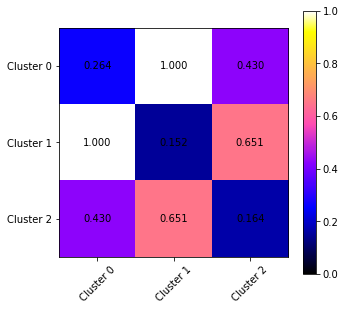

In [13]:
visualization_iris(X_iris, y_iris_complete)
print('Estimated number of clusters: ', len(set(y_iris_complete)))
print('Adjusted Rand Index: ',metrics.adjusted_rand_score(y_iris, y_iris_complete))
print('V-measure: ',metrics.v_measure_score(y_iris, y_iris_complete))
plot_pairwise_distances(X_iris, y_iris_complete, number_clusters_iris)

З отриманих результатів можна зробити висновок, що найкращим методом розрахунку відстані між кластерами для даного датасету є "average". Результати ARI = 0.76 i V-measure = 0.81, що є хорошим результатом для кластеризації. Найгірший результат кластеризації методом "single". Результати якого ARI = 0.56 та V-measure = 0.72.

#### Для blobs:

In [14]:
ward = AgglomerativeClustering(n_clusters=number_clusters_blobs, linkage="ward").fit(X_blobs)
single = AgglomerativeClustering(n_clusters=number_clusters_blobs, linkage="single").fit(X_blobs)
average = AgglomerativeClustering(n_clusters=number_clusters_blobs, linkage="average").fit(X_blobs)
complete = AgglomerativeClustering(n_clusters=number_clusters_blobs, linkage="complete").fit(X_blobs)
y_blobs_ward = ward.labels_
y_blobs_single = single.labels_
y_blobs_average = average.labels_
y_blobs_complete = complete.labels_

In [15]:
def visualization_blobs(X, y):
    scatter = plt.scatter(X[:, 0], X[:, 1], edgecolor="k", c=y, label=y)
    plt.legend(*scatter.legend_elements(), title="Clusters")
    plt.show()

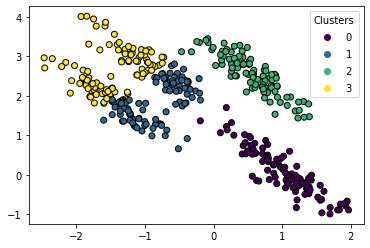

Estimated number of clusters:  4
Adjusted Rand Index:  0.6622327349512016
V-measure:  0.7419109761137346


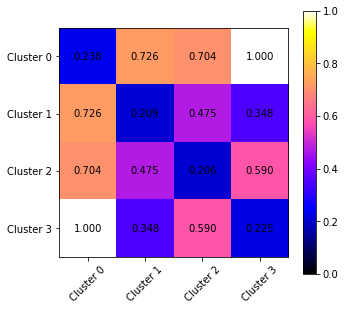

In [16]:
visualization_blobs(X_blobs, y_blobs_ward)
print('Estimated number of clusters: ', len(set(y_blobs_ward)))
print('Adjusted Rand Index: ', metrics.adjusted_rand_score(y_blobs, y_blobs_ward))
print('V-measure: ', metrics.v_measure_score(y_blobs, y_blobs_ward))
plot_pairwise_distances(X_blobs, y_blobs_ward, number_clusters_blobs)

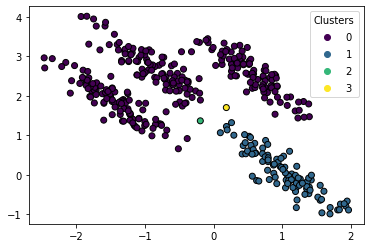

Estimated number of clusters:  4
Adjusted Rand Index:  0.3287043938637808
V-measure:  0.5709753243334644


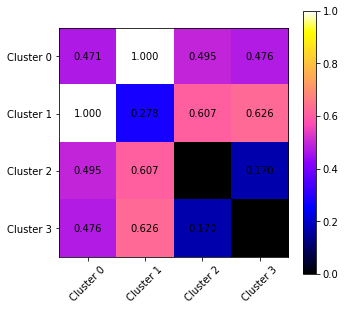

In [17]:
visualization_blobs(X_blobs, y_blobs_single)
print('Estimated number of clusters: ', len(set(y_blobs_single)))
print('Adjusted Rand Index: ', metrics.adjusted_rand_score(y_blobs, y_blobs_single))
print('V-measure: ', metrics.v_measure_score(y_blobs, y_blobs_single))
plot_pairwise_distances(X_blobs, y_blobs_single, number_clusters_blobs)

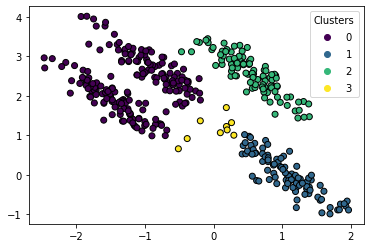

Estimated number of clusters:  4
Adjusted Rand Index:  0.6909687491010297
V-measure:  0.8182498429233156


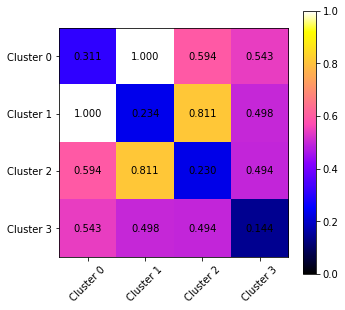

In [18]:
visualization_blobs(X_blobs, y_blobs_average)
print('Estimated number of clusters: ', len(set(y_blobs_average)))
print('Adjusted Rand Index: ', metrics.adjusted_rand_score(y_blobs, y_blobs_average))
print('V-measure: ', metrics.v_measure_score(y_blobs, y_blobs_average))
plot_pairwise_distances(X_blobs, y_blobs_average, number_clusters_blobs)

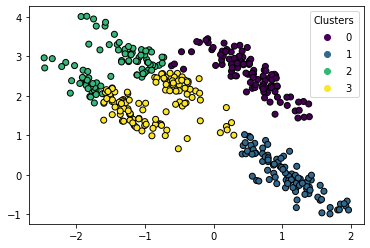

Estimated number of clusters:  4
Adjusted Rand Index:  0.6301650051348059
V-measure:  0.6968218446747383


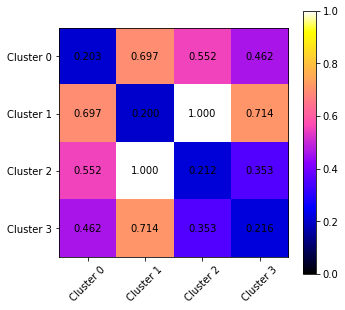

In [19]:
visualization_blobs(X_blobs, y_blobs_complete)
print('Estimated number of clusters: ', len(set(y_blobs_complete)))
print('Adjusted Rand Index: ', metrics.adjusted_rand_score(y_blobs, y_blobs_complete))
print('V-measure: ', metrics.v_measure_score(y_blobs, y_blobs_complete))
plot_pairwise_distances(X_blobs, y_blobs_complete, number_clusters_blobs)

Під час роботи із датасетом blobs ми отримали схожі результати, що і для iris, але із різними числами метрик якості кластеризації. Найкраща кластеризація із методом "average", а найгірша - "single".

Давайте також порівняємо отримані результати із початкивими даними:

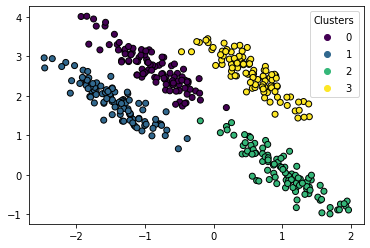

In [20]:
visualization_blobs(X_blobs, y_blobs)

Як бачимо ні один із методів кластеризації не зміг правильно класифікувати.

### Чи є розбиття стабільним після видалення окремих об'єктів:

In [21]:
from sklearn.model_selection import train_test_split

def analysis_delete_data(X, y, num_clusters, type_=None):
    for size in np.linspace(0.1, 0.8, 3):
        X_train, _, labels_train, _ = train_test_split(X, y, test_size=size)

        cluster = AgglomerativeClustering(n_clusters=num_clusters, linkage="average").fit(X_train)
        labels = cluster.labels_
        
        if type_ == 'iris':
            visualization_iris(X_train, labels)
        else:
            visualization_blobs(X_train, labels)

        print('Кластеризація для множини із розміром {:.1f}% від початкової'.format((1-size)*100))
        print('Adjusted Rand Index: ', metrics.adjusted_rand_score(labels_train, labels))
        print('V-measure: ', metrics.v_measure_score(labels_train, labels))

#### Для iris:

In [22]:
analysis_delete_data(X_iris, y_iris, number_clusters_iris, type_='iris')

Кластеризація для множини із розміром 90.0% від початкової
Adjusted Rand Index:  0.7575051626544828
V-measure:  0.8028940044126522


Кластеризація для множини із розміром 55.0% від початкової
Adjusted Rand Index:  0.5719973163990553
V-measure:  0.7100512498699728


Кластеризація для множини із розміром 20.0% від початкової
Adjusted Rand Index:  0.6340672018458876
V-measure:  0.7470323701458288


Як бачимо з вище наведених результатів алгоритм кластеризації продовжує доволі добре кластеризувати дані навіть при випадку видалення 80% точок.

#### Для blobs:

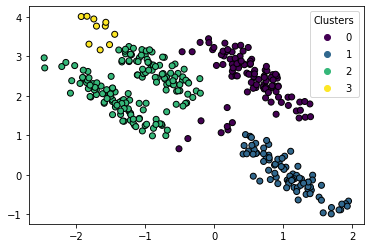

Кластеризація для множини із розміром 90.0% від початкової
Adjusted Rand Index:  0.6691407497895532
V-measure:  0.7652525768797367


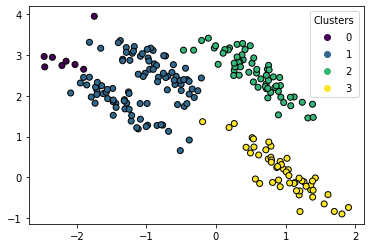

Кластеризація для множини із розміром 55.0% від початкової
Adjusted Rand Index:  0.7232559735696741
V-measure:  0.8292061668952042


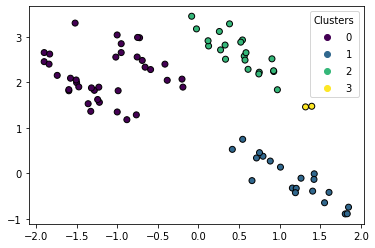

Кластеризація для множини із розміром 20.0% від початкової
Adjusted Rand Index:  0.7181665481491853
V-measure:  0.8424072493787151


In [23]:
analysis_delete_data(X_blobs, y_blobs, number_clusters_blobs, type_='blobs')

Під час роботи над датасетом "blobs" можна спостерігати, що навіть при видаленні невеликої частини даних утворюються кластери із невеликою кількістю точок і звіно кластери до яких входять по два початкових кластерів.

Також давайте розглянемо ситуацію, коли змінюється параметр n_cluster:

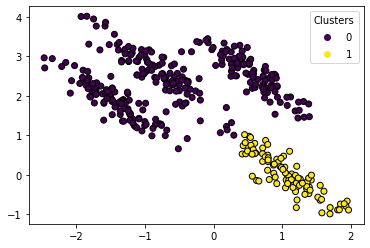

Estimated number of clusters: 2
Adjusted Rand Index:  0.2888574764919181
V-measure:  0.5058194765780168


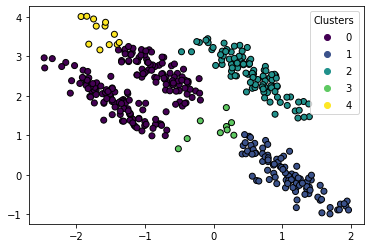

Estimated number of clusters: 5
Adjusted Rand Index:  0.6845195355091087
V-measure:  0.7994499362986587


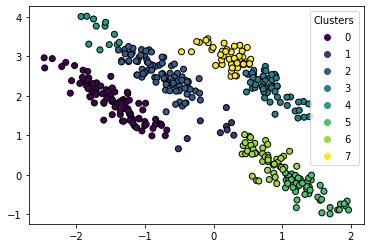

Estimated number of clusters: 8
Adjusted Rand Index:  0.7435308865274524
V-measure:  0.8265423614842402


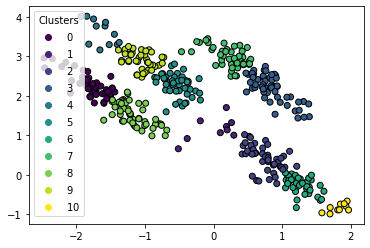

Estimated number of clusters: 11
Adjusted Rand Index:  0.5288843025449013
V-measure:  0.7411885919565988


In [24]:
for num in range(2,12, 3):
    cluster = AgglomerativeClustering(n_clusters=num, linkage="average").fit(X_blobs)
    labels = cluster.labels_
    visualization_blobs(X_blobs, labels)
    
    print('Estimated number of clusters:', len(set(labels)))
    print('Adjusted Rand Index: ', metrics.adjusted_rand_score(y_blobs, labels))
    print('V-measure: ', metrics.v_measure_score(y_blobs, labels))

З вище отриманих результатів можна спостерігати, як поводиться алгоритм AgglomerativeClustering із умовами, коли вказують кількість кластерів.

### Висновок:

Отже, під час роботи даної лабораторної роботи було проведено аналіз алгоритму кластеризації AgglomerativeClustering. Даний аналіз проводився на двох типах даних. Також було проведено дослідження методів розрахунку вiдстанi мiж кластерами. І для двох типів даних накращим метод розрахунку відстані виявився метод "average". Був проведений аналіз того, чи буде розбиття стабiльним пiсля того, як вилучимо окремі об’єкти. І даний аналіз показав, що після вилучення об'єктів, алгоритм продовжує працювати проте утворює інші кластери, які відрізняються за розміром та розташуванням.